### Introduction

-----------
OilGiant mining company is looking for an optimal location for a new well. There is data available from 3 regions with known parameters. The task is to build a model that will determine the region with highest profit margin while also having a low loss risk. Several techniques will be used including bootstrapping in order to determine best region. 

In [33]:
# Importing necceserary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:

# loading datasets
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')


### Data preprocessing

In [38]:
# Analyzing first region
print(data_0.info())
print('-'*20)
print('data_0 duplicates')
print(data_0.duplicated().sum())
print('-'*20)
print('data_0 number of missing values')
print(data_0.isna().sum())
print(data_0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
--------------------
data_0 duplicates
0
--------------------
data_0 number of missing values
f0         0
f1         0
f2         0
product    0
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      9

In [39]:
# Analyzng Second Region
print(data_1.info())
print('-'*20)
print('data_1 duplicates')
print(data_1.duplicated().sum())
print('-'*20)
print('data_1 number of missing values')
print(data_1.isna().sum())
print(data_1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
--------------------
data_1 duplicates
0
--------------------
data_1 number of missing values
f0         0
f1         0
f2         0
product    0
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      5

In [40]:
# Analyzing third region
print(data_2.info())
print('-'*20)
print('data_2 duplicates')
print(data_2.duplicated().sum())
print('-'*20)
print('data_2 number of missing values')
print(data_2.isna().sum())
print(data_2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
--------------------
data_2 duplicates
0
--------------------
data_2 number of missing values
f0         0
f1         0
f2         0
product    0
dtype: int64
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      9

There is not preprocessing required. No missing values or duplicate rows.

### Data Preparation

In [22]:
# Dropping id collumn to reducwe noise
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

In [23]:
# Quick look into all the data sets
print(data_0.head())
print(data_1.head())
print(data_2.head())

         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647
          f0         f1        f2     product
0 -15.001348  -8.276000 -0.005876    3.179103
1  14.272088  -3.475083  0.999183   26.953261
2   6.263187  -5.948386  5.001160  134.766305
3 -13.081196 -11.506057  4.999415  137.945408
4  12.702195  -8.147433  5.004363  134.766305
         f0        f1        f2     product
0 -1.146987  0.963328 -0.828965   27.758673
1  0.262778  0.269839 -2.530187   56.069697
2  0.194587  0.289035 -5.586433   62.871910
3  2.236060 -0.553760  0.930038  114.572842
4 -0.515993  1.716266  5.899011  149.600746


In [24]:
# Define features and target
features_0 = data_0.drop('product', axis=1)
features_1 = data_1.drop('product', axis=1)
features_2 = data_2.drop('product', axis=1)
target_0 = data_0["product"]
target_1 = data_1["product"]
target_2 = data_2["product"]

### Splitting Data

In [25]:
# splitting into training and validation sets 75/25 split
# First region
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)
# Second region
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)
# Third region
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

### Training and analyzing data

In [26]:
# Store train/valid splits in lists to loop later
train_features = [features_train_0, features_train_1, features_train_2]
valid_features = [features_valid_0, features_valid_1, features_valid_2]
train_targets = [target_train_0, target_train_1, target_train_2]
valid_targets = [target_valid_0, target_valid_1, target_valid_2]

# Initiate variables 
predictions_list = []
rmse_list = []

# Loop to train all linear regression models for all regions regions
for i in range(3):
    # Train linear regression model
    model = LinearRegression()
    model.fit(train_features[i], train_targets[i])

    # Predictions for all regions using validation set
    predictions = model.predict(valid_features[i])

    # Updating predictions list for all the regions
    predictions_list.append(predictions)

    # Calculate RMSE for each region
    rmse = mean_squared_error(valid_targets[i], predictions)** 0.5
    rmse_list.append(rmse)

    # Print results for each region
    print(f"Region {i}")
    print(f"Average predicted reserves: {predictions.mean():.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 40)


Region 0
Average predicted reserves: 92.59
RMSE: 37.58
----------------------------------------
Region 1
Average predicted reserves: 68.73
RMSE: 0.89
----------------------------------------
Region 2
Average predicted reserves: 94.97
RMSE: 40.03
----------------------------------------


### Analyzing results
Regions 0 and 2 show relatively high RMSE values compared to their mean targets, indicating less accurate model predictions in those areas. In contrast, Region 1 has a much lower RMSE, suggesting the model performs better there — though it’s worth noting that Region 1 also has the lowest average target value.

### Preparing for profit calculations

In [27]:
# Variables for profit calculations
budget = 100_000_000  
wells_per_region = 200  
revenue_per_unit = 4500  

# Breakeven formula:
breakeven_volume = (budget/wells_per_region)/(revenue_per_unit)

print(f'Each well needs to produce about {breakeven_volume:.2f} thousand barrels of oil to breakeven')

Each well needs to produce about 111.11 thousand barrels of oil to breakeven


In [28]:
print(f'Region 0 average production is {data_0["product"].mean():.2F} thousand barrels of oil')
print(f'Region 1 average production is {data_1["product"].mean():.2F} thousand barrels of oil')
print(f'Region 2 average production is {data_2["product"].mean():.2F} thousand barrels of oil')


Region 0 average production is 92.50 thousand barrels of oil
Region 1 average production is 68.83 thousand barrels of oil
Region 2 average production is 95.00 thousand barrels of oil


### Breakeven Analysis
On average each region does not produce enough oil in order to breakeven to cover the intial 100M investment.
We will instead find a subset of the best 200 performing wells in each region to achieve profit.

### Function to calculate profit

In [45]:

# Function to return profit and volume for top wells
def profit_function(targets, predictions, count):
    # Randomly select 500 wells
    sample_500 = predictions.sample(500, random_state=None).index
    
    # Subset to those wells
    sample_predictions = predictions.loc[sample_500]
    sample_targets = targets.loc[sample_500]
    
    # Pick top 200 wells from the 500
    top_predictions = sample_predictions.sort_values(ascending=False)[:count]
    top_wells = sample_targets[top_predictions.index]
    
    # Calculate profit and volume
    total_volume = top_wells.sum()
    total_profit = (total_volume * 4500) - budget

    return total_profit, total_volume

In [58]:

# Initiating list for looping
region_predictions = [pd.Series(predictions_list[0]),pd.Series(predictions_list[1]),pd.Series(predictions_list[2])]
region_targets = [target_valid_0.reset_index(drop=True) , target_valid_1.reset_index(drop=True), target_valid_2.reset_index(drop=True)]
region_profit = []
region_volume = []

for i in range(3):
    profit_region, volume_region = profit_function(region_targets[i], region_predictions[i], 200)
    region_profit.append(profit_region)
    region_volume.append(volume_region)


for i in range(3):
    print(f'Profit in region {i} is ${region_profit[i]:.2f}')
    print(f'Volume in region {i} is {region_volume[i]:.2f}\n')


Profit in region 0 is $4599227.05
Volume in region 0 is 23244.27

Profit in region 1 is $6097365.40
Volume in region 1 is 23577.19

Profit in region 2 is $5006335.87
Volume in region 2 is 23334.74



### Intital overview on profit

Region 1 appears to be the most profitable; however, it has the most volume! Further analysist is needed such as bootstrapping.

### Risk and profit with bootstrap method

Region 0
average profit: 3961649.85
95% confidence interval: (-1112155.46-9097669.42)
Percentage of loss risk 6.90%


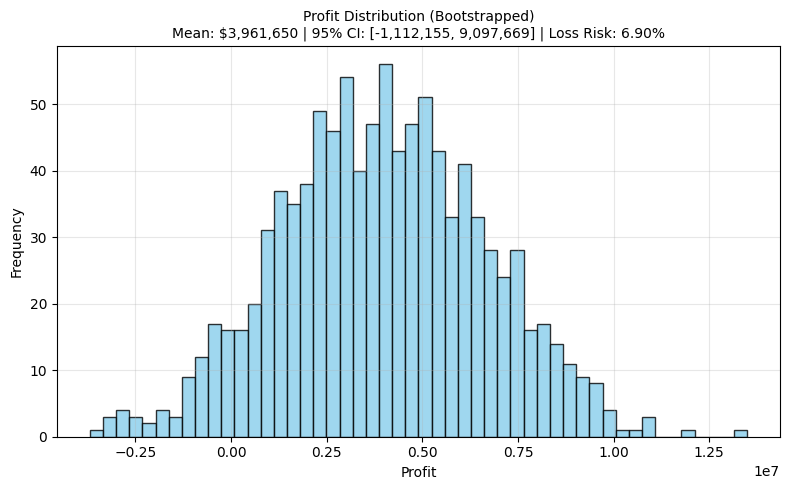


Region 1
average profit: 4560451.06
95% confidence interval: (338205.09-8522894.54)
Percentage of loss risk 1.50%


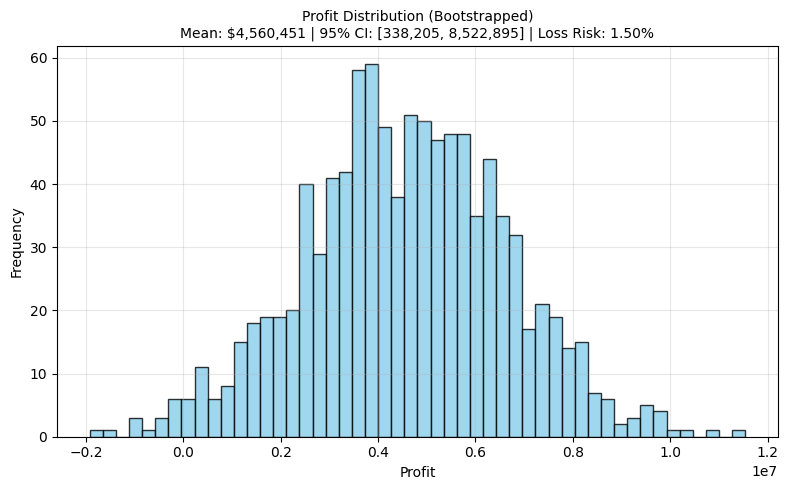


Region 2
average profit: 4044038.67
95% confidence interval: (-1633504.13-9503595.75)
Percentage of loss risk 7.60%


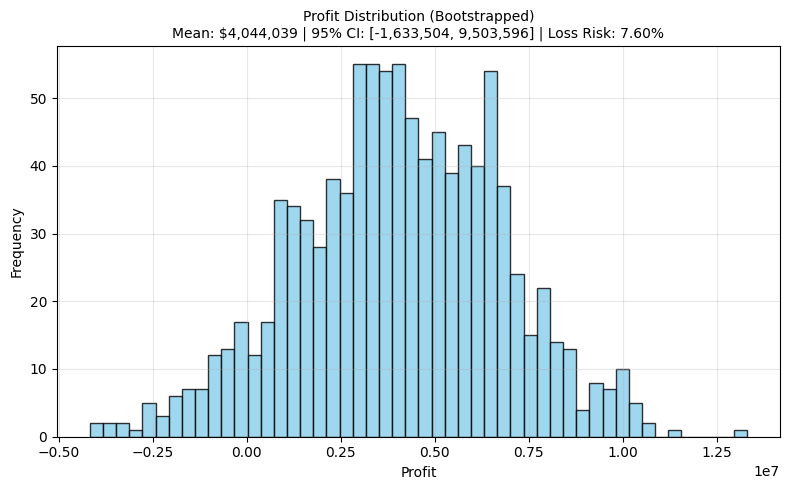

In [47]:
# Function with bootstrapping, 500 points used to explore data
def profit_distribution(targets,predictions,count):
    state = np.random.RandomState(12345)
    values = []

    combined_dataframe = pd.DataFrame()
    combined_dataframe['targets'] = targets.reset_index(drop=True)
    combined_dataframe['predictions'] = predictions

    for i in range(1000):
        target_subsample = combined_dataframe.sample(n=500, replace=True, random_state=state).reset_index(drop=True)
        values.append((profit_function(target_subsample['targets'], target_subsample['predictions'], count))[0])

    values = pd.Series(values)
    
    mean_profit = values.mean()

    lower = values.quantile(0.025)
    upper = values.quantile(0.975)

    # Find percentage of risk
    loss_count = (values<0).sum()
    loss_risk = loss_count/len(values)*100  
    print(f'average profit: {mean_profit:.2f}')
    print(f'95% confidence interval: ({lower:.2f}-{upper:.2f})')
    print(f'Percentage of loss risk {loss_count/len(values)*100:.2f}%')

    plt.figure(figsize=(8, 5))
    plt.hist(values, bins=50, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(
        f'Profit Distribution (Bootstrapped)\n'
        f'Mean: ${mean_profit:,.0f} | 95% CI: [{lower:,.0f}, {upper:,.0f}] | Loss Risk: {loss_risk:.2f}%',
        fontsize=10
    )
    plt.xlabel('Profit')
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

for i in range(3):
    print(f'Region {i}')
    profit_distribution(region_targets[i],region_predictions[i], 200)
    print()


### Conclusion

Among all three regions, only Region 1 meets the risk criterion of having a loss probability below 2.5%. In addition, Region 1’s 95% confidence interval lies entirely within the range of positive profit values, indicating a high likelihood of achieving consistent profitability.